In [830]:
# Analysis 
# From the statistical summary, it can be noted as below: 
## Mean and Median : Capomulin has the lowest mean Tumor Volume (40.676), while Ketapril has the highest (55.236). Capomulin has the lowest median (41.558), while Propriva has the highest (50.446).


## Variance and Standard Deviation : Ketapril has the highest variance (68.554), indicating a wider range of Tumor Volumes. Ramicane has the lowest variance (23.487), suggesting less variability in Tumor Volumes. Similarly, Ketapril has the highest standard deviation (8.280), indicating greater variability. Ramicane has the lowest standard deviation (4.846), showing less variability.

## Standard Error of the Mean (SEM): Capomulin has a low SEM (0.329), suggesting a more precise estimate of the mean whereas Ketapril has the highest SEM (0.604), indicating less precision in estimating the mean.

## Box Plot : While generating the box plots below it was noted Drug Capomulin and Ramicane having two outliers each indicating potential errors and therefore will require further investigation.

## Linear regression : From the calculation of correlation coefficient (0.84) and generated linear regression graph, it can be intepretated that there is positive relationships between weight and average Tumor volume on mouse. Whenever mouse's weight increses, tumor volume also increases.




In [831]:
# Dependencies and Setup 

import pandas as pd 
# import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st 


In [832]:
# Store filepaths into variable 
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [833]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [834]:
# Merge the dataframes base on the common column "Mouse ID"
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
combined_df = combined_df.sort_values(by='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [835]:
combined_df.columns 

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [836]:
# Display the number of unique mice ID
# mouse_metadata['Mouse ID'].nunique()
# mouse_metadata
unique_mouseID = combined_df['Mouse ID'].nunique()
unique_mouseID

249

In [837]:
#  Check for any mouse ID with duplicate time points
duplicate_timePoints = combined_df.loc[combined_df.duplicated(subset= ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_timePoints
# duplicate_timePoints = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
# duplicate_timePoints = duplicate_timePoints.sort_values(by='Tumor Volume (mm3)', ascending=True)
# duplicate_timePoints 

array(['g989'], dtype=object)

In [838]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# combined_df_clean = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
combined_clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_timePoints)==False]

combined_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [839]:
# Checking the number of mice in the clean DataFrame.
num_mouse_ids = combined_clean_df['Mouse ID'].nunique()
print("Number of unique Mouse IDs:", num_mouse_ids)

Number of unique Mouse IDs: 248


In [840]:
print("\033[1;32m Summary Statistics\033[0m")

 Summary Statistics


In [841]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## First group the data by the unique values in the 'Drug Regimen' column
grouped_data = combined_clean_df.groupby('Drug Regimen')

# Calculate the summary statistics
drug_regimen_table_by_volume = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Alternatively, you can calculate each statistic separately
mean = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Rename the columns
drug_regimen_table_by_volume.columns = ['Mean Tumore Volume', 'Median Tumore Volume', 'Tumore Volume Variance', 'Tumore Volume Std. Dev.', 'Tumore Volume Std. Err.']


drug_regimen_table_by_volume

,Mean Tumore Volume,Median Tumore Volume,Tumore Volume Variance,Tumore Volume Std. Dev.,Tumore Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [842]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## First group the data by the unique values in the 'Drug Regimen' column
grouped_data = combined_clean_df.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM for the 'Tumor Volume (mm3)' column
drug_regimen_table_by_volume = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', lambda x: np.std(x) / np.sqrt(len(x))])

# Rename the columns
drug_regimen_table_by_volume.columns = ['Mean Tumore Volume', 'Median Tumore Volume', 'Tumore Volume Variance', 'Tumore Volume Std. Dev.', 'Tumore Volume Std. Err.']

# Print the table
drug_regimen_table_by_volume


,Mean Tumore Volume,Median Tumore Volume,Tumore Volume Variance,Tumore Volume Std. Dev.,Tumore Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


Text(0.5, 1.0, 'Number of Rows per Drug Regimen')

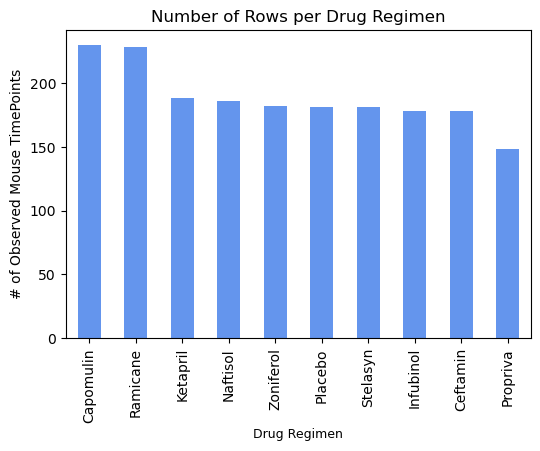

In [859]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd 
# Extracting the drug regimen and counting the number of rows for each regimen
drug_counts = combined_clean_df['Drug Regimen'].value_counts()

# Plotting the bar chart with aesthetic improvements
ax = drug_counts.plot(kind='bar', color='cornflowerblue', figsize=(6, 4))

# Adding labels and title with customized font size
ax.set_xlabel('Drug Regimen', fontsize=9)
ax.set_ylabel('# of Observed Mouse TimePoints', fontsize=10)
ax.set_title('Number of Rows per Drug Regimen', fontsize=12)



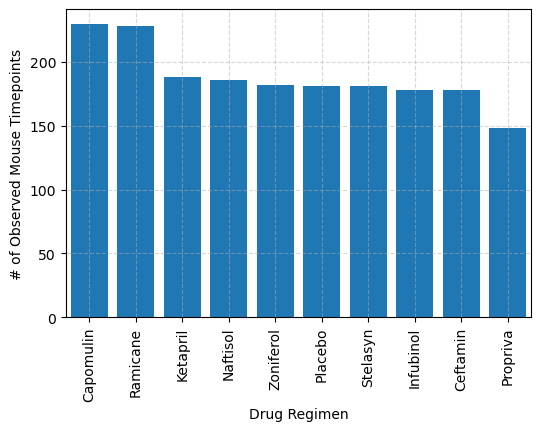

In [844]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Calculate the total number of rows for each drug regimen
drug_counts = combined_clean_df['Drug Regimen'].value_counts()

# Plotting the bar chart with aesthetic improvements
plt.figure(figsize=(6, 4))

# Using a color palette and enabling grid lines
drug_counts.plot(kind='bar', color='lavender')
plt.grid(True, linestyle='--', alpha=0.5)

# Extract the drug regimens and row counts
drug_regimens = drug_counts.index
row_counts = drug_counts.values

# Plot the bar chart
plt.bar(drug_regimens, row_counts)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

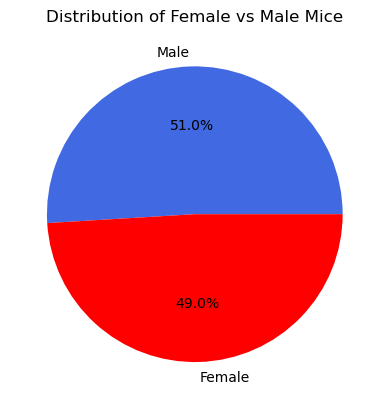

In [845]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd

# Calculate the count of female and male mice
gender_counts = combined_clean_df['Sex'].value_counts()

# Create a pie plot using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['royalblue', 'red'])

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Remove the y-axis label
plt.ylabel('')

# Display the plot
plt.show()

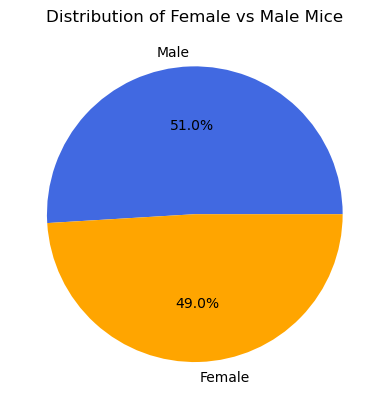

In [846]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' containing the relevant data
# Calculate the counts for each category
category_counts = combined_clean_df['Sex'].value_counts()

# Extract the values and labels from the DataFrame
values = category_counts.values
labels = category_counts.index

# Optionally, create a list of colors
colors = ['royalblue', 'orange']

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

In [847]:
print("\033[1;32m Quartiles, Outliers and Boxplots\033[0m")

 Quartiles, Outliers and Boxplots


In [848]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Group the DataFrame by ID and filter for the specific values in column B
grouped_df = combined_clean_df[combined_clean_df['Drug Regimen'].isin(specific_regimens)].groupby('Mouse ID')

# Calculate the total volume for each unique ID
total_volume = grouped_df['Tumor Volume (mm3)'].sum()

# Convert the series to a DataFrame
total_volume_df = pd.DataFrame(total_volume)

# Rename the column
total_volume_df.columns = ['Total Volume']

# Reset the index
total_volume_df.reset_index(inplace=True)

# Print the result
total_volume_df



,Mouse ID,Total Volume
0,a203,563.127077
1,a251,552.370946
2,a275,527.709651
3,a411,407.013854
4,a444,430.600524
...,...,...
95,y769,562.908873
96,y793,385.068292
97,y865,549.985586
98,z578,384.115100


In [849]:
# Start by getting the last (greatest) timepoint for each mouse

specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Group the DataFrame by ID and filter for the specific values in column B
grouped_df = combined_clean_df[combined_clean_df['Drug Regimen'].isin(specific_regimens)].groupby('Mouse ID')

# Calculate the maximum value for column Z for each unique ID
max_TimePoint_value = grouped_df['Timepoint'].max()

# Convert the series to a DataFrame
max_TimePoint_value_df = pd.DataFrame(max_TimePoint_value)

# Rename the column
max_TimePoint_value_df.columns = ['max_TimePoint_value']

# Reset the index
max_TimePoint_value_df.reset_index(inplace=True)
max_TimePoint_value_df

,Mouse ID,max_TimePoint_value
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [850]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = total_volume_df.merge(max_TimePoint_value_df, on = 'Mouse ID')
merge_df


,Mouse ID,Total Volume,max_TimePoint_value
0,a203,563.127077,45
1,a251,552.370946,45
2,a275,527.709651,45
3,a411,407.013854,45
4,a444,430.600524,45
...,...,...,...
95,y769,562.908873,45
96,y793,385.068292,45
97,y865,549.985586,45
98,z578,384.115100,45


In [851]:
# Put treatments into a list for for loop (and later for plot labels)
# Extract unique treatment regimens
specific_regimens_list = combined_clean_df['Drug Regimen'].unique().tolist()

# Filter for the specific regimens you want
specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Ensure only the regimens you are interested in are in the list
specific_regimens_list = [regimen for regimen in specific_regimens_list if regimen in specific_regimens]

def new_func(specific_regimens_list):
    print(specific_regimens_list)

new_func(specific_regimens_list)


['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']


In [852]:
# Create an empty list to store tumor volume data
# Initialize an empty dictionary to store volume data for each treatment regimen
tumor_volume_data = {regimen: [] for regimen in specific_regimens_list}

# Loop through the merge_df DataFrame and append volume data to the corresponding list
for index, row in merge_df.iterrows():
    regimen = combined_clean_df.loc[combined_clean_df['Mouse ID'] == row['Mouse ID'], 'Drug Regimen'].iloc[0]
    tumor_volume_data[regimen].append(row['Total Volume'])

# Now, volume_data dictionary contains lists of volume data for each treatment regimen
tumor_volume_data


{'Infubinol': [563.12707705,
  552.37094603,
  355.4003434,
  530.1146736000001,
  587.40942947,
  81.3213458,
  365.38676796,
  550.2654276000001,
  518.97959235,
  496.57607545999997,
  557.98679797,
  424.73228747999997,
  92.01036401,
  368.77146924,
  403.34820421,
  90.69933087999999,
  348.17605385,
  298.16480406,
  91.25011212,
  250.34313264,
  195.05679137,
  238.23112028,
  356.85866622,
  557.11687934,
  539.79583694],
 'Ceftamin': [527.70965092,
  45.0,
  300.04703288,
  358.9998406,
  188.23985302,
  92.7846818,
  538.24225939,
  558.84893972,
  545.0098232299999,
  354.0308197,
  137.59362373,
  528.5589626,
  534.67355232,
  516.11146932,
  536.64383127,
  469.15237295,
  45.0,
  290.02268209,
  45.0,
  530.53553426,
  45.0,
  532.63939784,
  528.48979583,
  562.9088725199999,
  549.98558612],
 'Ramicane': [407.01385427,
  430.60052438,
  379.89218656,
  412.28577471,
  295.88437385,
  418.68769118,
  396.40442953999997,
  442.68126878,
  374.89236629,
  378.8287777,
 

In [853]:
# Dictionary to store quartiles and potential outliers for each treatment regimen
quartiles_and_outliers = {}

# Calculate quartiles and potential outliers for each treatment regimen
for regimen, data in tumor_volume_data.items():
    # Convert volume data to numpy array for easier calculations
    data_np = np.array(data)
    
    # Calculate quartiles
    quartiles = np.percentile(data_np, [25, 50, 75])
    Q1 = quartiles[0]
    Q3 = quartiles[2]
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine potential outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    potential_outliers = [value for value in data_np if value < lower_bound or value > upper_bound]
    
    # Store results in the quartiles_and_outliers dictionary
    quartiles_and_outliers[regimen] = {'Quartiles': quartiles, 'IQR': IQR, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Potential Outliers': potential_outliers}

# Print results
for regimen, result in quartiles_and_outliers.items():
    print(f"Treatment Regimen: {regimen}")
    print(f"Quartiles: {result['Quartiles']}")
    print(f"IQR: {result['IQR']}")
    print(f"Lower Bound: {result['Lower Bound']}")
    print(f"Upper Bound: {result['Upper Bound']}")
    print(f"Potential Outliers: {result['Potential Outliers']}")
    print("\n")

Treatment Regimen: Infubinol
Quartiles: [250.34313264 368.77146924 539.79583694]
IQR: 289.45270429999994
Lower Bound: -183.8359238099999
Upper Bound: 973.9748933899998
Potential Outliers: []


Treatment Regimen: Ceftamin
Quartiles: [188.23985302 516.11146932 534.67355232]
IQR: 346.4336993
Lower Bound: -331.41069593000003
Upper Bound: 1054.32410127
Potential Outliers: []


Treatment Regimen: Ramicane
Quartiles: [360.50156185 388.07794581 407.01385427]
IQR: 46.512292419999994
Lower Bound: 290.73312322000004
Upper Bound: 476.7822929
Potential Outliers: [88.16637266000001, 181.43908834]


Treatment Regimen: Capomulin
Quartiles: [361.82039562 398.87495191 425.07261035]
IQR: 63.25221472999999
Lower Bound: 266.942073525
Upper Bound: 519.950932445
Potential Outliers: [182.5298638, 183.19587803, 124.15447563000001]




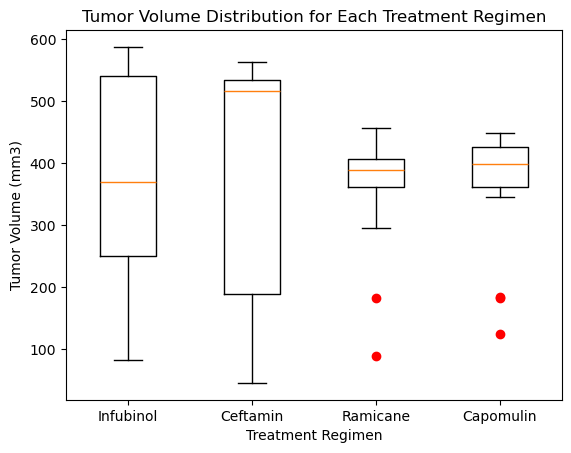

In [854]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# List of treatment regimens
treatment_regimens = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# List to store tumor volume data for each treatment regimen
data_to_plot = [tumor_volume_data[regimen] for regimen in treatment_regimens]

# Create a box plot
plt.boxplot(data_to_plot, labels=treatment_regimens, sym='r')
plt.title('Tumor Volume Distribution for Each Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


/var/folders/zf/0vbcb4t96mg7ygrsh_n7b7f40000gn/T/ipykernel_1647/272639351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_data['Tumor Volume (mm3)'] = pd.to_numeric(mouse_data['Tumor Volume (mm3)'])


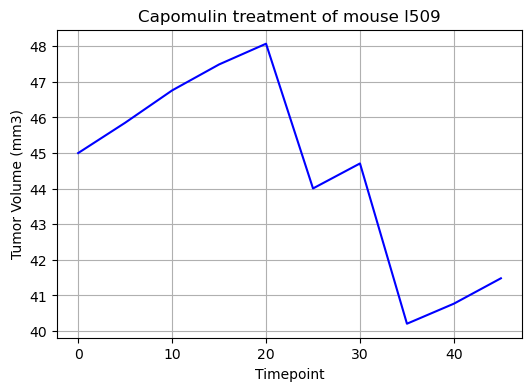

In [855]:
# Select data for a specific mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = combined_clean_df[(combined_clean_df['Drug Regimen'] == 'Capomulin') & (combined_clean_df['Mouse ID'] == mouse_id)]

# Convert 'Tumor Volume (mm3)' column to numeric data type
mouse_data['Tumor Volume (mm3)'] = pd.to_numeric(mouse_data['Tumor Volume (mm3)'])

# Aggregate the data by taking the mean tumor volume for each timepoint
mouse_data_mean = mouse_data.groupby('Timepoint')['Tumor Volume (mm3)'].mean().reset_index()

# Plot the line plot
plt.figure(figsize=(6, 4))
plt.plot(mouse_data_mean['Timepoint'], mouse_data_mean['Tumor Volume (mm3)'], color='b', linestyle='-')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

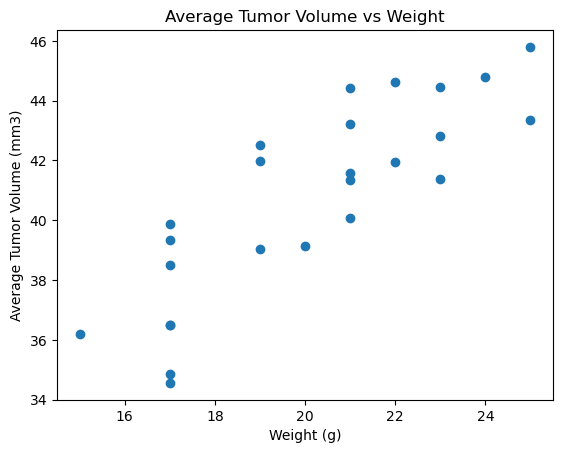

In [856]:
# Filter the data for items with "Capomulin" in "Drug Regimen" column
capomulin_data = combined_clean_df[combined_clean_df['Drug Regimen'] == 'Capomulin']

# Get the unique Mouse IDs
mouse_ids = capomulin_data['Mouse ID'].unique()

# Calculate the average tumor volume and weight for each Mouse ID
average_tumor_volumes = []
weights = []
for mouse_id in mouse_ids:
    average_tumor_volume = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]['Tumor Volume (mm3)'].mean()
    average_tumor_volumes.append(average_tumor_volume)
    weight = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]['Weight (g)'].mean()
    weights.append(weight)

# Create a DataFrame with the Mouse IDs, average tumor volumes, and weights
result_df = pd.DataFrame({'Mouse ID': mouse_ids, 'Average Tumor Volume': average_tumor_volumes, 'Weight (g)': weights})

# Create the scatter plot
plt.scatter(result_df['Weight (g)'], result_df['Average Tumor Volume'])

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Weight')

# Show the plot
plt.show()

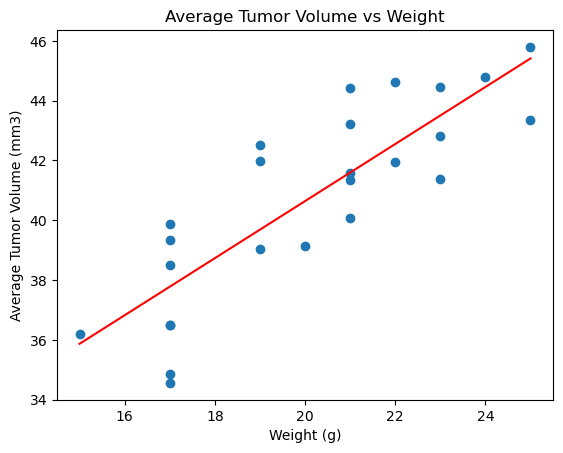

In [857]:
# Get the unique Mouse IDs
mouse_id = result_df['Mouse ID'].unique()

# Create the scatter plot
plt.scatter(result_df['Weight (g)'], result_df['Average Tumor Volume'])

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Weight')

# Add the trend line
from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(result_df['Weight (g)'], result_df['Average Tumor Volume'])
x = np.linspace(result_df['Weight (g)'].min(), result_df['Weight (g)'].max(), 100)
y = slope * x + intercept
plt.plot(x, y, color='red')

# Show the plot
plt.show()